#第8章：神經網路
在本章中，我們構建一個基於神經網路的分類器，以解決第6章中的新聞分類任務。 編寫程式時，請活用PyTorch， TensorFlow， Chainer等深度學習庫。

#70. 基於詞向量之和來生成特徵
考慮將第50問中構建的訓練集、驗證集與測試集表示為矩陣或向量的形式。 具體地，對於每一個數據集，分別構建：

特徵矩陣\（X\），由所有實例的特徵向量\（\boldsymbol{x}_i\）拼接而成;
標籤向量\（Y\），由所有實例所對應的真實類別標註\（y_i\）排列而成。
即：

\[X = \begin{pmatrix} \boldsymbol{x}_1 \\ \boldsymbol{x}_2 \\ \dots \\ \boldsymbol{x}_n \\ \end{pmatrix} \in \mathbb{R}^{n \times d}, Y = \begin{pmatrix} y_1 \\ y_2 \\ \dots \\ y_n \\ \end{pmatrix} \in \mathbb{N}^{n}\]
上式中，\（n\）代表數據集中的實例總數。 \（\boldsymbol{x}_i \in \mathbb{R}^d\） 及 \（y_i \in \mathbb{N}\） 分別代表第\（i \in {1,...,n}\）個實例所對應的特徵向量及真實類別標籤。 設 \（\mathbb{N}_4\） 代表小於4的自然數（包括0），本次任務中，我們進行{“Business”， “Science”， “Entertainment”， “Health”}的四分類，則任一實例的真實類別標籤\（y_i\）均可用\（y_i \in \mathbb{N}_4\）表示。 下文以\（L\）代表類別的種數（這裡\（L=4\））。

第\（i\）個實例的特徵向量\（\boldsymbol{x}_i\）可以通過下式計算：

\[\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t}),\]
其中第\（i\）個實例由單詞序列\（（w_{i，1},...,w_{i，T_i}）\）構成，共\（T_i\）個詞，對應該實例的標題; 每個詞\（w\）對應的詞向量為\（emb（w） \in \mathbb{R}^{d}\）（維度為\（d\））。 我們直接使用60問中所提供的預訓練詞向量，因此維度為300（即\（d=300\））。

第\（i\）個實例的真實類別標籤\（y_i\）通過下式定義（保證類別名與其標籤一一對應即可）：

\[y_i = \begin{cases} 0 & (\mbox{if article }\boldsymbol{x}_i\mbox{ belongs to Business category}) \\ 1 & (\mbox{if article }\boldsymbol{x}_i\mbox{ belongs to Science category}) \\ 2 & (\mbox{if article }\boldsymbol{x}_i\mbox{ belongs to Entertainment category}) \\ 3 & (\mbox{if article }\boldsymbol{x}_i\mbox{ belongs to Health category}) \\ \end{cases}\]
基於上述要求， 建立以下矩陣和向量，並保存至檔：

訓練集的特徵矩陣： \（X_{\rm train} \in \mathbb{R}^{N_t \times d}\）
訓練集的標籤向量： \（Y_{\rm train} \in \mathbb{N}^{N_t}\）
驗證集的特徵矩陣： \（X_{\rm valid} \in \mathbb{R}^{N_v \times d}\）
驗證集的標籤向量： \（Y_{\rm valid} \in \mathbb{N}^{N_v}\）
測試集的特徵矩陣： \（X_{\rm test} \in \mathbb{R}^{N_e \times d}\）
測試集的標籤向量： \（Y_{\rm test} \in \mathbb{N}^{N_e}\）
其中\（N_t， N_v， N_e\）分別代表訓練集，驗證集，測試集中的實例總數。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#71. 基於單層神經網路的預測
讀取第70問中所保存的矩陣與向量，在訓練集上進行如下計算：

\[\hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W), \\ \hat{Y} = {\rm softmax}(X_{[1:4]} W)\]
其中，\（{\rm softmax}\）代表softmax函數，\（X_{[1：4]} \in \mathbb{R}^{4 \times d}\）代表由\（\boldsymbol{x}_1， \boldsymbol{x}_2， \boldsymbol{x}_3， \boldsymbol{x}_4\）縱向連接而成的矩陣，即：

\[X_{[1:4]} = \begin{pmatrix} \boldsymbol{x}_1 \\ \boldsymbol{x}_2 \\ \boldsymbol{x}_3 \\ \boldsymbol{x}_4 \\ \end{pmatrix}\]
\（W \in \mathbb{R}^{d \times L}\）是單層神經網络的權重矩陣。 本問的計算中，暫時直接使用隨機初始化的值（第73問中將通過機器學習更新此權重矩陣）。 注意\（\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L\）代表使用未經學習的權重矩陣\（W\）計算后，實例\（x_1\）所屬類別的概率分佈。 類似地，\（\hat{Y} \in \mathbb{R}^{n \times L}\）代表訓練集中的實例\（x_1， x_2， x_3， x_4\）所屬類別的概率分佈。

In [2]:
#第六章50題
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
!head -10 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [4]:
#read data 母群
#資料前處理
df = pd.read_csv('./newsCorpora.csv', sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [5]:
!!wget "https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true"

['--2025-05-14 07:31:09--  https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true',
 'Resolving github.com (github.com)... 20.205.243.166',
 'Connecting to github.com (github.com)|20.205.243.166|:443... connected.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]',
 '--2025-05-14 07:31:09--  https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz',
 'Reusing existing connection to github.com:443.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]',
 '--2025-05-14 07:31:09--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz',
 'Resolv

In [6]:
!ls #現在位置

 drive							  newsCorpora.csv
'GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true'	  sample_data
'GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true.1'


In [8]:
from gensim.models import KeyedVectors
#把詞向量讀入模型 有點像df的感覺
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin.gz', binary=True)

In [9]:
from re import X
import numpy as np
#prompt: 使用df製作 訓練集的特徵矩陣 訓練集的標籤向量 測試集的特徵矩陣 測試集的標籤向量 驗證集的特徵矩陣 驗證集的標籤向量
#假設df and model are defined as in the provided code.
def vectorize_text (text,model):
  """converts a text string to a vector by averaging the word vectors."""
  vectors = []
  for word in text.split():
    try:
      vectors.append(model[word])
    except KeyError:
      pass #Ignore words not in the vocabulary
  if vectors:
    return np.mean(vectors, axis=0) #句向量
  else:
    return np.zeros(300) #Return a zero vector if no words are found
#Create feature  vectors for each text in df ["TITLE"]
df['feature_vector'] = df['TITLE'].apply(lambda x: vectorize_text(x,model))
category_to_model = {'b': 0, 't': 1, 'e': 2, 'm': 3}
df['category_model'] = df['CATEGORY'].map(category_to_model)
#Example mapping
df['label'] = df['CATEGORY'].map(category_to_model)
#Split the data
#Split the data
train_df,temp_df = train_test_split(df,test_size=0.3,random_state=42)
valid_df,test_df = train_test_split(temp_df,test_size=0.5,random_state=42)

# Create feature and label matrices/vectors
def create_matrices(df):
  X = np.array(df['feature_vector'].tolist())
  Y = np.array(df['label']. tolist())
  return X,Y

X_train,Y_train = create_matrices(train_df)
X_valid,Y_valid = create_matrices(valid_df)
X_test,Y_test = create_matrices(test_df)

print("X_train.shape:",X_train.shape)
print("Y_train.shape:",Y_train.shape)
print("X_valid.shape:",X_valid.shape)
print("Y_valid.shape:",Y_valid.shape)
print("X_test.shape:",X_test.shape)
print("Y_test.shape:",Y_test.shape)

from scipy.special import softmax
import matplotlib.pyplot as plt

# 假設特徵維度d=5，類別數L=4
d = 5 #特徵維度
L = 4 #類別數

#生成4個樣本，每個樣本是d維
np.random.seed(0) #固定種子，結果可重現
x1 = np.random.randn(d)
x2 = np.random.randn(d)
x3 = np.random.randn(d)
x4 = np.random.randn(d)

#把四個樣本堆成一個矩陣（4×d）
X_1to4 = np.vstack([x1, x2, x3, x4]) #check

#隨機初始化權重矩陣 W（d×L）
W = np.random.randn(d, L)

#--- 計算單個樣本 x1 ---
z1 = x1 @ W  # (1xd）@（dxL）→>（1xL）
y_hat_1 = softmax (z1) #（1xL）

#---計算4個樣本 X_｛［1:4]｝ ---
Z = X_1to4 @ W #（4xd）@（dxL）→>（4xL）
Y_hat = softmax (Z, axis=1)

# --- 輸出 ---
print("x1原始特徵向量:")
print(x1)
print("\nW權重矩陣:")
print(W)
print("\n單個樣本 x1 經過W乘上後再softmax，得到的機率分布y_hat_1:")
print(y_hat_1)
print("多樣本原始特徵向量:")
print(X_1to4)
print("\n全部4個様本經過W乘上後再softmax，得到的機率分布 Y_hat:")
print(Y_hat)

X_train.shape: (295693, 300)
Y_train.shape: (295693,)
X_valid.shape: (63363, 300)
Y_valid.shape: (63363,)
X_test.shape: (63363, 300)
Y_test.shape: (63363,)
x1原始特徵向量:
[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]

W權重矩陣:
[[-2.55298982  0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852 -0.18718385]
 [ 1.53277921  1.46935877  0.15494743  0.37816252]
 [-0.88778575 -1.98079647 -0.34791215  0.15634897]
 [ 1.23029068  1.20237985 -0.38732682 -0.30230275]]

單個樣本 x1 經過W乘上後再softmax，得到的機率分布y_hat_1:
[0.06688915 0.33225773 0.48389862 0.1169545 ]
多樣本原始特徵向量:
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]]

全部4個様本經過W乘上後再softmax，得到的機率分布 Y_hat:
[[0.06688915 0.33225773 0.48389862 0.1169545 ]
 [0.9867861  0.00139573 0.0025353  0.00928286]
 [0.97439585 0.00566424 0.011460

#72. 計算損失（loss）及梯度（gradients）
在訓練集中的實例\（x_1\）與實例集合\（x_1， x_2， x_3， x_4\）上分別計算交叉熵損失（cross-entropy loss）及對矩陣\（W\）的梯度。 對於單個實例\（x_1\），使用下式計算損失：

\[l_i = - \log [\mbox{樣本}x_i\mbox{被分類為}y_i\mbox{的概率}]\]
對於一個實例集合，求集合中各實例損失的平均值，作為該集合的交叉熵損失。


In [10]:
print(z1)
print(y_hat_1)

[-1.78695361 -0.18407949  0.19188497 -1.22820547]
[0.06688915 0.33225773 0.48389862 0.1169545 ]


In [11]:
import numpy as np
#假設正確標籤(真實類別):
y1_true = 2 #x1的正確類別是2
y_true = np.array([2,1,3,0]) #x1,x2,x3,x4的正確標籤

#單個樣本的交叉滳損失
loss1 = -np.log(y_hat_1[y1_true])
#多個樣本的平均交叉滳損失
loss_all = -np.mean(np.log(Y_hat[np.arange(4),y_true]))
#計算w的梯度
#單個樣本
y1_onehot = np.zeros(L)
y1_onehot[y1_true] = 1 #1把正確類別標成1
grad_w_single = np.outer(x1,(y_hat_1 - y1_onehot)) #(d x L)
#多個樣本
Y_true_onehot = np.zeros_like(Y_hat) #(4 x L)
Y_true_onehot[np.arange(4),y_true] = 1
grad_w_all = X_1to4.T@(Y_hat - Y_true_onehot)/4 #(d x L)

print(f"單個樣本的x1的交叉滳損失:{loss1:.4f}")
print(f"4個樣本的x1的交叉滳損失:{loss_all:.4f}")
print(f"\n單個樣本對W的梯度 grad_w_single:")
print(grad_w_single)
print(f"\n4個樣本平均後對W的梯度:{grad_w_all}")
print(grad_w_all)

單個樣本的x1的交叉滳損失:0.7259
4個樣本的x1的交叉滳損失:3.1929

單個樣本對W的梯度 grad_w_single:
[[ 0.11799597  0.58612002 -0.91042985  0.20631386]
 [ 0.02676618  0.13295532 -0.20652169  0.04680019]
 [ 0.06546696  0.32519326 -0.50512803  0.11446781]
 [ 0.14989145  0.74455408 -1.15652808  0.26208255]
 [ 0.12491937  0.62051057 -0.96384926  0.21841931]]

4個樣本平均後對W的梯度:[[-0.21855391  0.39105306 -0.19864023  0.02614109]
 [ 0.40704592 -0.20036725  0.08376933 -0.29044799]
 [ 0.19027015  0.11995305 -0.14213501 -0.16808819]
 [ 0.00219524  0.2123991  -0.26147656  0.04688223]
 [ 0.34828358  0.05237796 -0.31410605 -0.0865555 ]]
[[-0.21855391  0.39105306 -0.19864023  0.02614109]
 [ 0.40704592 -0.20036725  0.08376933 -0.29044799]
 [ 0.19027015  0.11995305 -0.14213501 -0.16808819]
 [ 0.00219524  0.2123991  -0.26147656  0.04688223]
 [ 0.34828358  0.05237796 -0.31410605 -0.0865555 ]]


#73. 基於隨機梯度下降法（SGD）的訓練
使用隨機梯度下降法（Stochastic Gradient Descent）更新矩陣\（W\）。 選用適當的基準終止訓練（如“100個epochs后終止”）。

In [12]:
from operator import le
#設定訓練超參數
learning_rate = 0.01
epochs = 100
n_samples = 4

for epoch in range(epochs):
  #挑第一筆 (隨機挑一筆資料)
  x_i = X_1to4[0]
  y_i = y_true[0]
  #Forward
  z_i = x_i @ W
  y_hat_i = softmax(z_i)

  #Compute loss(for_monitoring)
  loss_i = -np.log(y_hat_i[y_i])
  #Compute gradient
  y_onehot = np.zeros(L)
  y_onehot[y_i] = 1
  grad_W = np.outer(x_i,(y_hat_i - y_onehot)) #(d x L)
  #Update W
  W -= learning_rate * grad_W
  #每10個epoch輸出一次loss
  if(epoch % 10 == 0):
    #為了看趨勢訓練，可以計算目前整批資料的loss
    Z_train = X_1to4 @ W
    Y_hat_train = softmax(Z_train)
    loss_train = -np.mean(np.log(Y_hat_train[np.arange(n_samples),y_true]))
    print(f"Epoch {epoch+1}, Loss: {loss_train:.4f}")
#最後的權重
print("\n訓練完成後的W:")
print(W)

Epoch 1, Loss: 5.6954
Epoch 11, Loss: 5.5683
Epoch 21, Loss: 5.4858
Epoch 31, Loss: 5.4271
Epoch 41, Loss: 5.3825
Epoch 51, Loss: 5.3469
Epoch 61, Loss: 5.3175
Epoch 71, Loss: 5.2926
Epoch 81, Loss: 5.2711
Epoch 91, Loss: 5.2523

訓練完成後的W:
[[-2.60082268  0.49872546  1.14244872 -0.81745154]
 [ 2.25890423 -1.4895016   0.10882281 -0.20426183]
 [ 1.50624041  1.38342039  0.30919535  0.33639178]
 [-0.94854831 -2.17755876  0.00524992  0.06071175]
 [ 1.17965123  1.03839837 -0.09300193 -0.3820067 ]]


#74. 計算正確率
使用第73問中訓練所得的矩陣對訓練集與驗證集進行分類，並分別計算正確率。

In [13]:
#驗證集
np.random.seed(1)
xv1 = np.random.randn(d)
xv2 = np.random.randn(d)
X_val = np.vstack([xv1,xv2])
Y_val = np.array([1,3])
#訓練集上的正確率
Z_train = X_1to4 @ W #4x4
Y_hat_train = softmax(Z_train,axis=1)
y_pred_train = np.argmax(Y_hat_train,axis=1)

accuracy_train = np.mean(y_pred_train == y_true)
print(f"訓練集正確率:{accuracy_train*100:.2f}%")
#驗證集上的正確率
Z_val = X_val @ W #(2x4)
Y_hat_val = softmax(Z_val,axis=1)
y_pred_val = np.argmax(Y_hat_val,axis=1)
accuracy_val = np.mean(y_pred_val == Y_val)
print(f"驗證集正確率:{accuracy_val*100:.2f}%")

訓練集正確率:50.00%
驗證集正確率:50.00%


#75. 損失與正確率的可視化
修改第73問中的代碼，使得每個epoch完成訓練后，以折線圖的方式記錄模型當前：

在訓練集上的損失;
在訓練集上的正確率;
在驗證集上的損失;
在驗證集上的正確率。
通過該組折線圖監控訓練的進程。

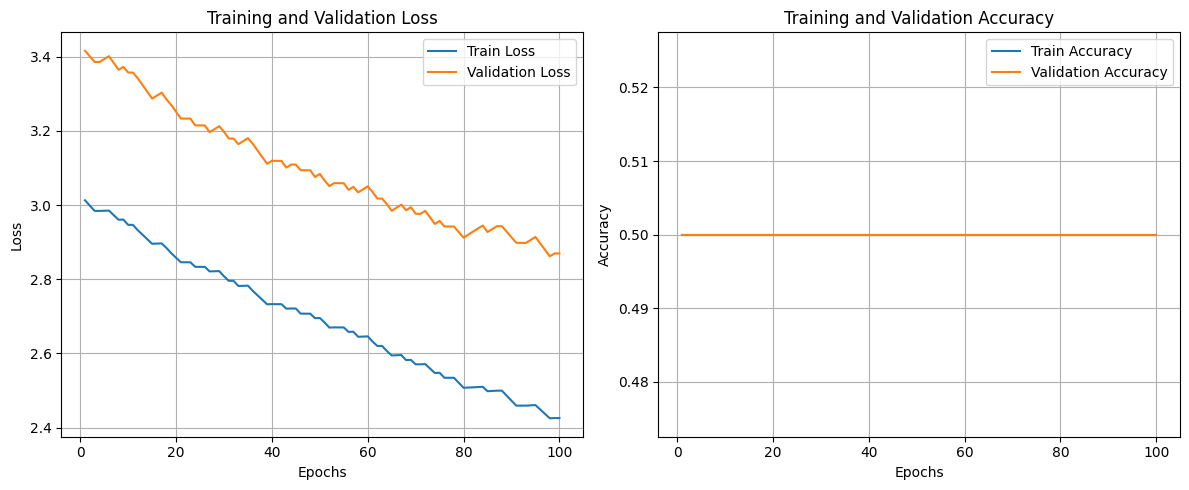

In [14]:
# 建立紀錄的list
import os
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
  # 隨機抽一筆
  idx = np.random.randint(n_samples)
  x_i = X_1to4[idx]
  y_i = y_true[idx]

  # Forward
  z_i = x_i @ W
  y_hat_i = softmax(z_i)

  # Backward
  y_onehot = np.zeros(L)
  y_onehot[y_i] = 1
  grad_W = np.outer(x_i, (y_hat_i - y_onehot))

  # Update
  W -= learning_rate * grad_W

  # --- 每個epoch結束後記錄train/val的loss和accuracy ---

  #訓練集
  Z_train = X_1to4 @ W
  Y_hat_train = softmax(Z_train, axis=1)
  y_pred_train = np.argmax(Y_hat_train, axis=1)
  loss_train = -np.mean(np.log(Y_hat_train[np.arange(n_samples), y_true]))
  acc_train = np.mean(y_pred_train == y_true)

  #驗證集
  Z_val = X_val @ W
  Y_hat_val = softmax(Z_val, axis=1)
  y_pred_val = np.argmax(Y_hat_val, axis=1)
  loss_val = -np.mean(np.log(Y_hat_val[np.arange(X_val.shape[0]), Y_val]))
  acc_val = np.mean(y_pred_val == Y_val)

  #紀錄
  train_losses.append(loss_train)
  train_accuracies.append(acc_train)
  val_losses.append(loss_val)
  val_accuracies.append(acc_val)

# === 畫圖 ===
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12,5))
# 畫loss
plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# 畫accuracy
plt.subplot(1,2,2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#76. 檢查點（Checkpoints）
修改第75問中的代碼，使得每個epoch訓練結束后，保存檢查點（模型參數的值，優化演算法的狀態等）至檔。

檢查點已保存
檢查點已保存


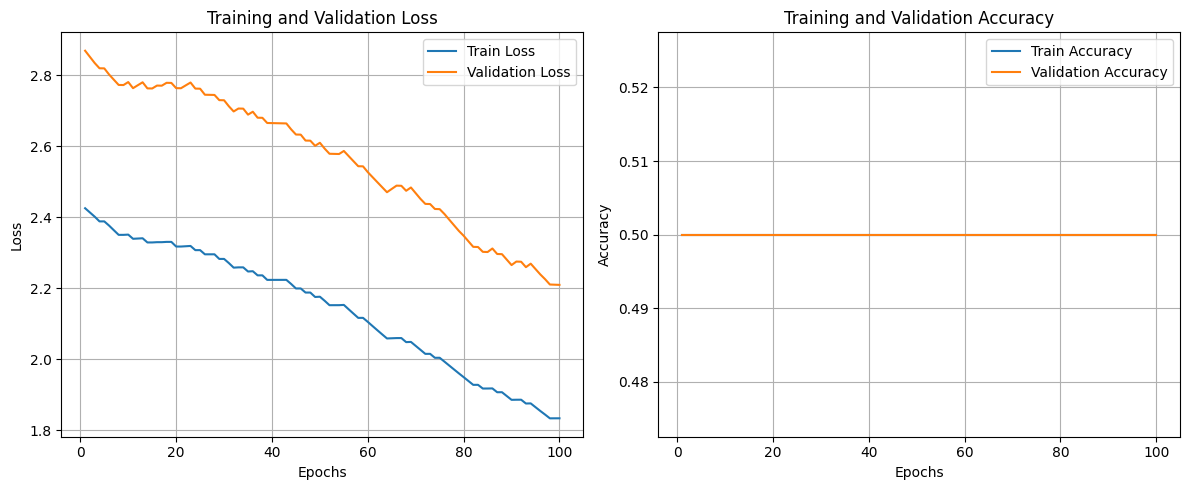

In [15]:
# 建立紀錄的list
import os
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
  # 隨機抽一筆
  idx = np.random.randint(n_samples)
  x_i = X_1to4[idx]
  y_i = y_true[idx]

  # Forward
  z_i = x_i @ W
  y_hat_i = softmax(z_i)

  # Backward
  y_onehot = np.zeros(L)
  y_onehot[y_i] = 1
  grad_W = np.outer(x_i, (y_hat_i - y_onehot))

  # Update
  W -= learning_rate * grad_W

  # --- 每個epoch結束後記錄train/val的loss和accuracy ---

  #訓練集
  Z_train = X_1to4 @ W
  Y_hat_train = softmax(Z_train, axis=1)
  y_pred_train = np.argmax(Y_hat_train, axis=1)
  loss_train = -np.mean(np.log(Y_hat_train[np.arange(n_samples), y_true]))
  acc_train = np.mean(y_pred_train == y_true)

  #驗證集
  Z_val = X_val @ W
  Y_hat_val = softmax(Z_val, axis=1)
  y_pred_val = np.argmax(Y_hat_val, axis=1)
  loss_val = -np.mean(np.log(Y_hat_val[np.arange(X_val.shape[0]), Y_val]))
  acc_val = np.mean(y_pred_val == Y_val)

  #紀錄
  train_losses.append(loss_train)
  train_accuracies.append(acc_train)
  val_losses.append(loss_val)
  val_accuracies.append(acc_val)

  if(epoch+1)%50==0:
    os.makedirs("checkpoints",exist_ok=True)
    np.savez("checkpoints/checkpoint_epoch_{}.npz".format(epoch+1),W=W,epoch=epoch+1)
    print("檢查點已保存")

# === 畫圖 ===
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12,5))
# 畫loss
plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# 畫accuracy
plt.subplot(1,2,2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#77. Mini-batches
修改第76問中的代碼，使得以每\（B\）個實例為單位計算損失和梯度，並更新權重矩陣\（W\）（mini-batch化）。 改變\（B\）的值為\（1， 2， 4， 8， \dots\），比較不同情況下訓練一個epoch所耗費的時間

In [18]:
X_train,Y_train = create_matrices(train_df)
X_valid,Y_valid = create_matrices(valid_df)
X_test,Y_test = create_matrices(test_df)
X_train.shape

(295693, 300)


訓練 Batch size =1

訓練 Batch size =2

訓練 Batch size =4

訓練 Batch size =8

訓練 Batch size =16

訓練 Batch size =32

訓練 Batch size =64

訓練 Batch size =128


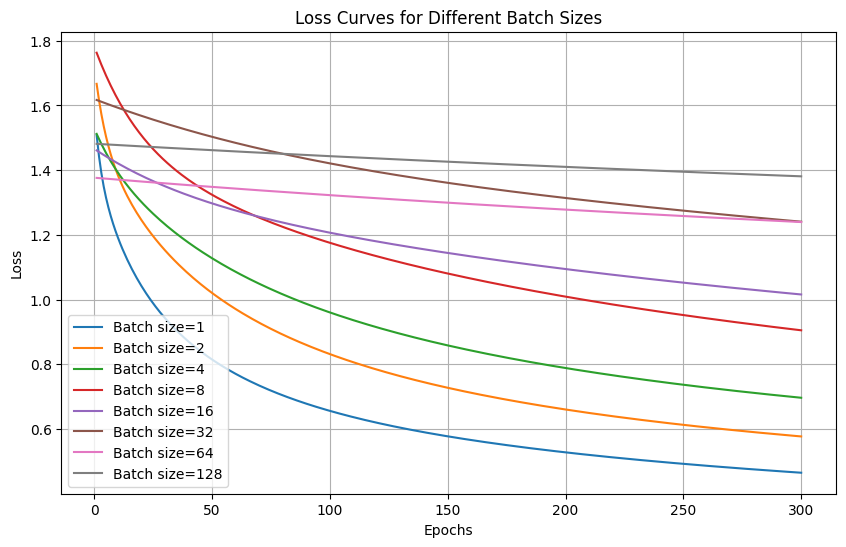

In [17]:
#先產生訓練資料
d = 300 #特徵維度
L = 4 #類別數
n_samples = 1024

import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

learning_rate=0.01
epochs =300 #為了讓收斂曲線明顯
batch_sizes = [1,2,4,8,16,32,64,128]
loss_curves = {}
for B in batch_sizes:
  print(f"\n訓練 Batch size ={B}")
  #初始化
  W = np. random. randn(d, L)
  Losses =[]
 #紀錄每個epoch的Loss
  for epoch in range(epochs):
    indices = np. arange(n_samples)
    np. random. shuffle(indices)
    epoch_losses = []
    for i in range(0, n_samples, B):
      batch_idx = indices [i:i+B]
      x_batch = X_train[batch_idx]
      y_batch = Y_train[batch_idx]
      # Forward
      Z_batch = x_batch @ W
      Y_hat_batch = softmax(Z_batch, axis=1)
      # Loss
      #epsilon = 1e-12 # 一個非常小的正數
      batch_loss = -np.mean(np.log(Y_hat_batch[np.arange(len(y_batch)), y_batch]))
      epoch_losses.append(batch_loss)
      # Backward
      Y_true_onehot = np. zeros_like(Y_hat_batch)
      Y_true_onehot[np.arange(len (y_batch)), y_batch] = 1
      grad_W = (x_batch.T @ (Y_hat_batch - Y_true_onehot)) / B
      # Update
      W-= learning_rate * grad_W
    #每個epoch紀錄一個平均loss
    Losses.append(np.mean(epoch_losses))
  loss_curves[B] = Losses
#畫圖
plt.figure(figsize=(10,6))
for B ,losses in loss_curves.items():
  plt.plot(range(1,epochs+1),losses,label=f"Batch size={B}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()

#78. GPU訓練
修改77問中的代碼，使得訓練能夠在GPU上進行。

#79. 多層神經網路
修改第78問中的代碼，通過引入偏置項（bias）、增加網路層數等操作，改變神經網路的架構，以構建一個高性能的分類器。

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8202 - loss: 0.4895 - val_accuracy: 0.8662 - val_loss: 0.3738
Epoch 2/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8814 - loss: 0.3294 - val_accuracy: 0.8860 - val_loss: 0.3235
Epoch 3/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8986 - loss: 0.2831 - val_accuracy: 0.8925 - val_loss: 0.3086
Epoch 4/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9105 - loss: 0.2528 - val_accuracy: 0.8928 - val_loss: 0.3061
Epoch 5/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9178 - loss: 0.2298 - val_accuracy: 0.8974 - val_loss: 0.2949
Epoch 6/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9242 - loss: 0.2112 - val_accuracy: 0.9003 - val_loss: 0.2877
Epoch 7/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9303 - loss: 0.1962 - val_accuracy: 0.8993 - val_loss: 0.2937
Epoch 8/30
4621/4621 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9348 - loss: 0

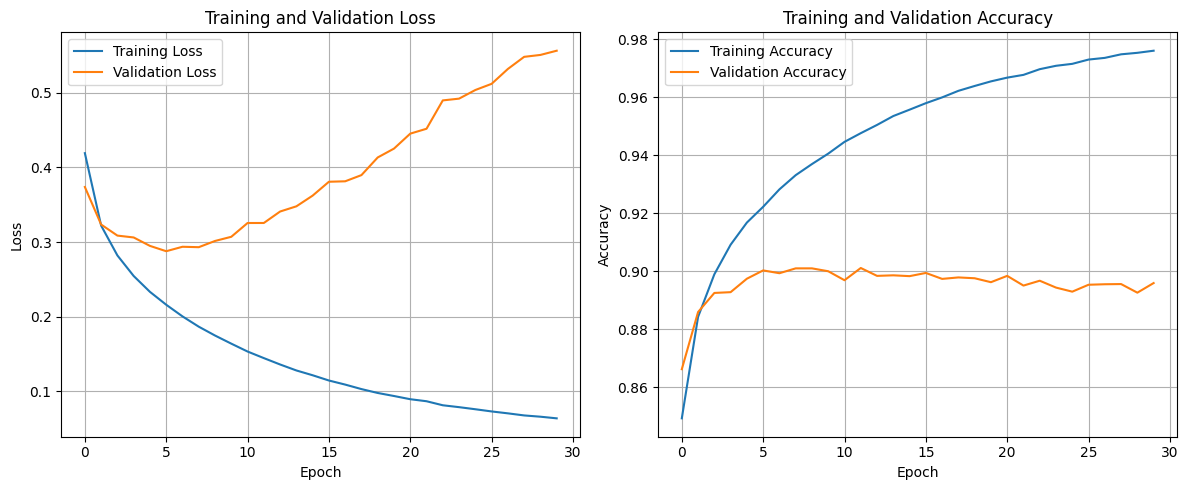

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# --資料---
d=300
L=4
n_samples = 3000
# --建立模型-
model = keras.Sequential([
  layers.Dense(256, activation='relu', input_shape=(d,)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(L, activation='softmax')])
#---编譯---
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
#---- 訓練(加上驗證集)-
history = model.fit(
  X_train,Y_train,
  epochs=30,
  batch_size=64,validation_data=(X_valid, Y_valid),verbose=1)
# --畫出訓練與驗證損失與準確率--
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()